In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithoutMask/1017.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithoutMask/4803.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithoutMask/5106.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithoutMask/3765.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithoutMask/780.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithoutMask/3952.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithoutMask/227.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithoutMask/2731.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithoutMask/579.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithoutMask/353.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/Wi

Getting the size and shape of the image in the dataset

In [2]:
import cv2

#load the image

image=cv2.imread("/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_701_7042336.png")


#Get the dimensions
height,width,channels=image.shape

print(f"Image Dimensions:Height{height},Width{width},channels{channels}")

Image Dimensions:Height224,Width224,channels3


Giving the paths and setting up train and test paths

In [3]:
'''data set path'''

dataset_path= '/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset'

In [23]:
'''train and test path'''

train_path='/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train'

test_path='/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Test'

validation_path = '/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation'

'''Data Augmentation'''

In [9]:
import os

# Define the paths to your train and test data directories
train_data_dir_with_mask = "/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask"
train_data_dir_without_mask = "/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask"
test_data_dir_with_mask = "/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Test/WithMask"
test_data_dir_without_mask = "/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Test/WithoutMask"

# Function to count the number of images in a directory
def count_images_in_directory(directory):
    if os.path.exists(directory):
        return len([filename for filename in os.listdir(directory) if filename.endswith((".jpg", ".png"))])
    else:
        return 0

# Count images in the train and test directories
train_image_count_with_mask = count_images_in_directory(train_data_dir_with_mask)
train_image_count_without_mask = count_images_in_directory(train_data_dir_without_mask)
test_image_count_with_mask = count_images_in_directory(test_data_dir_with_mask)
test_image_count_without_mask = count_images_in_directory(test_data_dir_without_mask)

# Print the counts
print(f"Number of images in the train directory: {train_image_count_with_mask}")
print(f"Number of images in the train directory: {train_image_count_without_mask}")
print(f"Number of images in the train directory: {test_image_count_with_mask}")
print(f"Number of images in the test directory: {test_image_count_without_mask}")


Number of images in the train directory: 5000
Number of images in the train directory: 5000
Number of images in the train directory: 483
Number of images in the test directory: 509


In [6]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from PIL import Image 
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import glob
import keras
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [18]:
import os

# Directory containing the original training images
original_train_dir1 = '/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask'
original_train_dir2 = '/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask'


# Count the number of files in the directory
num_original_train_images1 = len(os.listdir(original_train_dir1))
print("Number of original training images before data augmentation:", num_original_train_images1)

num_original_train_images2 = len(os.listdir(original_train_dir2))
print("Number of original training images before data augmentation:", num_original_train_images2)



Number of original training images before data augmentation: 5000
Number of original training images before data augmentation: 5000


In [20]:
from keras.preprocessing.image import ImageDataGenerator

# Set up an ImageDataGenerator for on-the-fly augmentation
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

# Directory containing the original training images
original_train_dir = '/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train'

# Create a data generator for the original training data
original_train_gen = train_datagen.flow_from_directory(original_train_dir, target_size=(200, 200), batch_size=20, class_mode='binary', color_mode='rgb')

# Count the total number of augmented images during training
total_augmented_images = 0

for _ in range(len(original_train_gen)):
    images, _ = next(original_train_gen)
    total_augmented_images += images.shape[0]

print("Total number of augmented training images during training:", total_augmented_images)


Found 10000 images belonging to 2 classes.
Total number of augmented training images during training: 10000


Found 10000 images belonging to 2 classes.


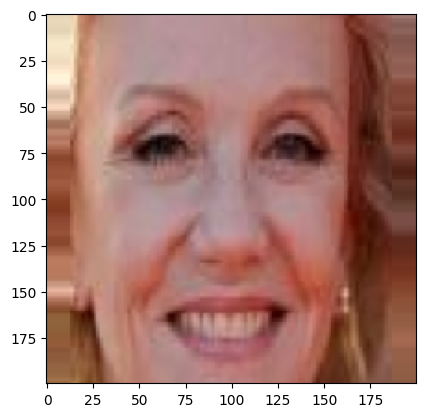

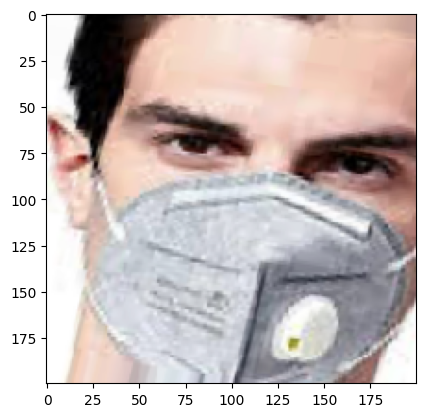

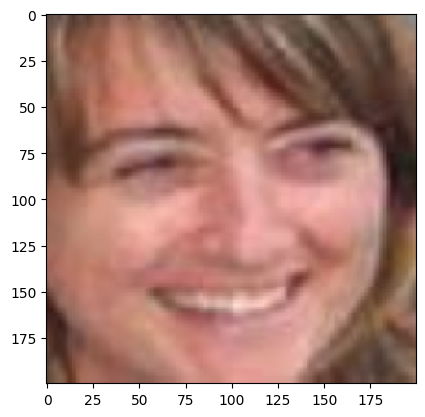

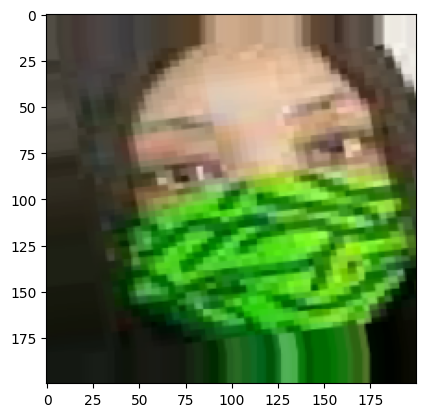

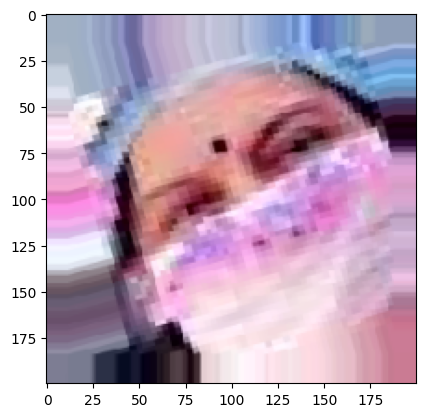

In [15]:
import matplotlib.pyplot as plt
from keras.preprocessing import image

# Assuming train_ds is your data generator
augmented_images = train_datagen.flow_from_directory(train_path, target_size=(200, 200), batch_size=20, class_mode='binary', color_mode='rgb')

# Generate a batch of augmented images
images, labels = next(augmented_images)

# Display the first few images
for i in range(5):  # Adjust the range to the number of images you want to display
    plt.imshow(images[i])
    plt.show()


In [24]:
''' ImageDataGenerator '''

''' data augmentation ''' # Data Augmentation part simply we are generating the required data
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255) #means that the pixel values of the images will be divided by 255,
validation_datagen = ImageDataGenerator(rescale=1./255)

train_ds = train_datagen.flow_from_directory(train_path, target_size = (200,200), batch_size = 20, class_mode = 'binary',
                                         color_mode = 'rgb')

test_ds = test_datagen.flow_from_directory(test_path, target_size = (200,200), batch_size = 20, class_mode = 'binary',
                                           color_mode = 'rgb')
# Validation Data
validation_ds = validation_datagen.flow_from_directory(validation_path,target_size=(200, 200),batch_size=20,class_mode='binary',color_mode='rgb')

Found 10000 images belonging to 2 classes.
Found 992 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [25]:
''' Model '''

''' container '''
model = Sequential()


#Input layer
''' Convolutional layers '''
model.add(Convolution2D(32, (3, 3), input_shape = (200, 200, 3), activation = 'relu')) # 200, 200 because we converted input shape to that and 1 because its a gray scale image
model.add(MaxPooling2D(pool_size = (2, 2)))

#convolution layer

model.add(Convolution2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2))) #Maxpooling2D is a layer that performs max pooling 2*2 and 3*3 are mostly used

model.add(Convolution2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2))) #taking larger pool size results in increased computational complexity and loss of spatial info

model.add(Convolution2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

#Flatten layer

model.add(Flatten())

''' Hidden Layer '''
model.add(Dense(128, activation = 'relu'))

''' Classification Layer '''
model.add(Dense(1, activation = 'sigmoid'))

In [26]:
''' Compile the model '''
from tensorflow.keras.metrics import CategoricalAccuracy
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [27]:
''' training '''
history = model.fit(train_ds, epochs = 10, validation_data= validation_ds)

Epoch 1/10
500/500 [==============================] - 386s 768ms/step - loss: 0.1658 - accuracy: 0.9389 - val_loss: 0.0551 - val_accuracy: 0.9862
Epoch 2/10
500/500 [==============================] - 380s 760ms/step - loss: 0.0819 - accuracy: 0.9718 - val_loss: 0.0305 - val_accuracy: 0.9900
Epoch 3/10
500/500 [==============================] - 382s 763ms/step - loss: 0.0527 - accuracy: 0.9814 - val_loss: 0.0572 - val_accuracy: 0.9800
Epoch 4/10
500/500 [==============================] - 377s 753ms/step - loss: 0.0581 - accuracy: 0.9801 - val_loss: 0.0449 - val_accuracy: 0.9775
Epoch 5/10
500/500 [==============================] - 375s 749ms/step - loss: 0.0439 - accuracy: 0.9841 - val_loss: 0.0253 - val_accuracy: 0.9887
Epoch 6/10
500/500 [==============================] - 375s 750ms/step - loss: 0.0289 - accuracy: 0.9889 - val_loss: 0.0111 - val_accuracy: 0.9937
Epoch 7/10
500/500 [==============================] - 375s 750ms/step - loss: 0.0288 - accuracy: 0.9894 - val_loss: 0.0172 -

In [28]:
history1 = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
500/500 [==============================] - 376s 751ms/step - loss: 0.0405 - accuracy: 0.9872 - val_loss: 0.0138 - val_accuracy: 0.9975
Epoch 2/10
500/500 [==============================] - 374s 747ms/step - loss: 0.0297 - accuracy: 0.9898 - val_loss: 0.0215 - val_accuracy: 0.9937
Epoch 3/10
500/500 [==============================] - 373s 746ms/step - loss: 0.0219 - accuracy: 0.9916 - val_loss: 0.0177 - val_accuracy: 0.9900
Epoch 4/10
500/500 [==============================] - 373s 746ms/step - loss: 0.0220 - accuracy: 0.9918 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 5/10
500/500 [==============================] - 371s 741ms/step - loss: 0.0200 - accuracy: 0.9928 - val_loss: 0.0943 - val_accuracy: 0.9538
Epoch 6/10
500/500 [==============================] - 376s 751ms/step - loss: 0.0214 - accuracy: 0.9925 - val_loss: 0.0056 - val_accuracy: 0.9975
Epoch 7/10
500/500 [==============================] - 374s 748ms/step - loss: 0.0205 - accuracy: 0.9937 - val_loss: 0.0442 -

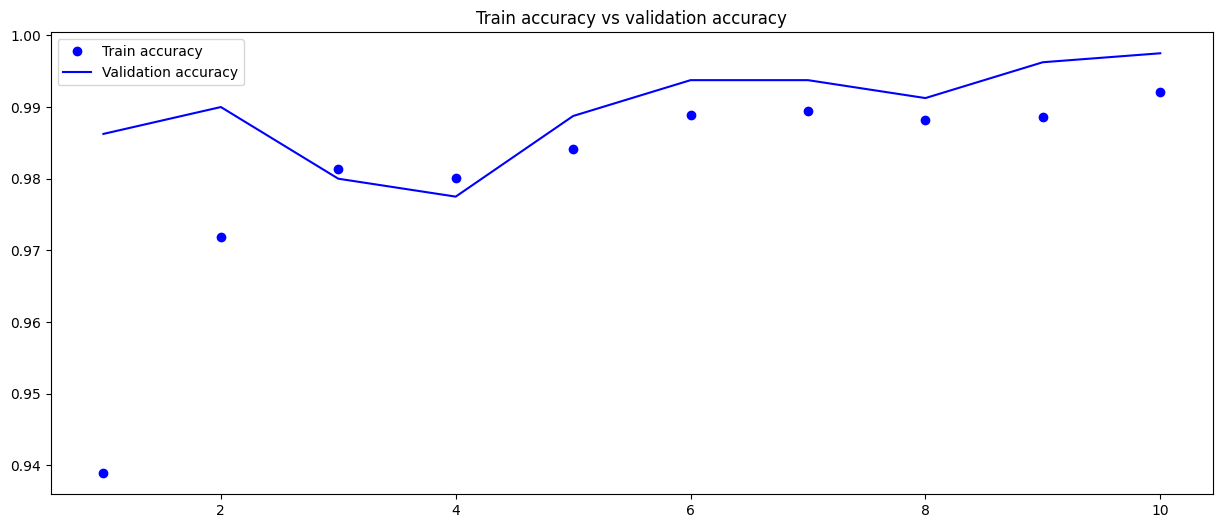

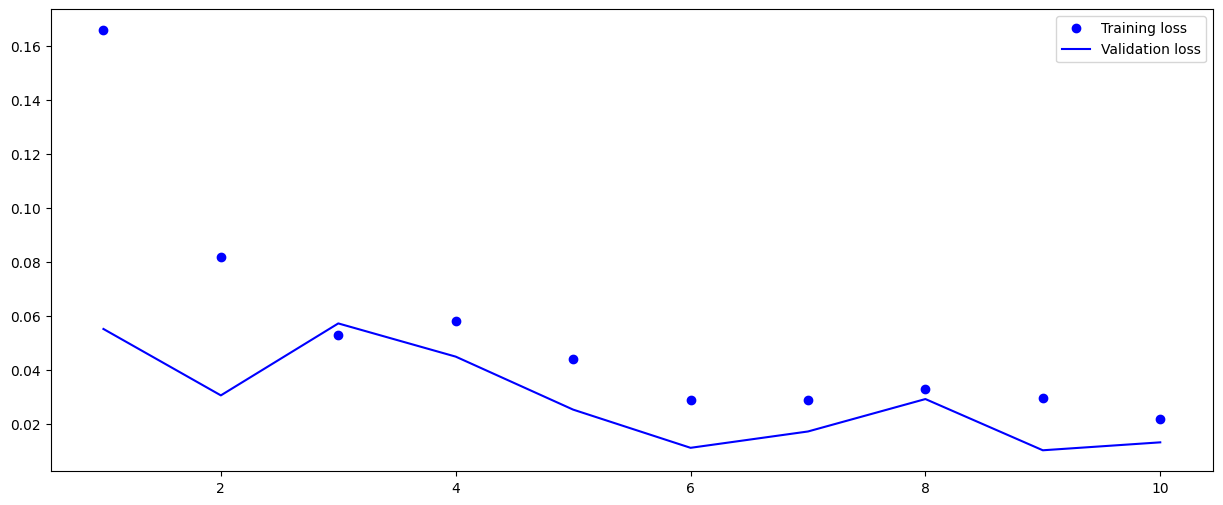

In [33]:
epochs = range(1, len(history.history["accuracy"]) + 1)

''' plotting training accuracy and validation accuracy '''
plt.figure(figsize=(15, 6))
plt.plot(epochs, history.history["accuracy"], "bo", label="Train accuracy")
plt.plot(epochs, history.history["val_accuracy"], "b", label="Validation accuracy")
plt.title("Train accuracy vs validation accuracy")
plt.legend()

''' plotting training loss and validation loss '''
plt.figure(figsize=(15, 6))
plt.plot(epochs, history.history["loss"], "bo", label="Training loss")
plt.plot(epochs, history.history["val_loss"], "b", label="Validation loss")
plt.legend()

plt.show()


In [34]:
''' evaluating the model '''
test_loss, test_acc = model.evaluate(test_ds, steps = 9)
print("Test ACC: ", round(test_acc, 2))

9/9 [==============================] - 2s 255ms/step - loss: 0.0209 - accuracy: 0.9889
Test ACC:  0.99


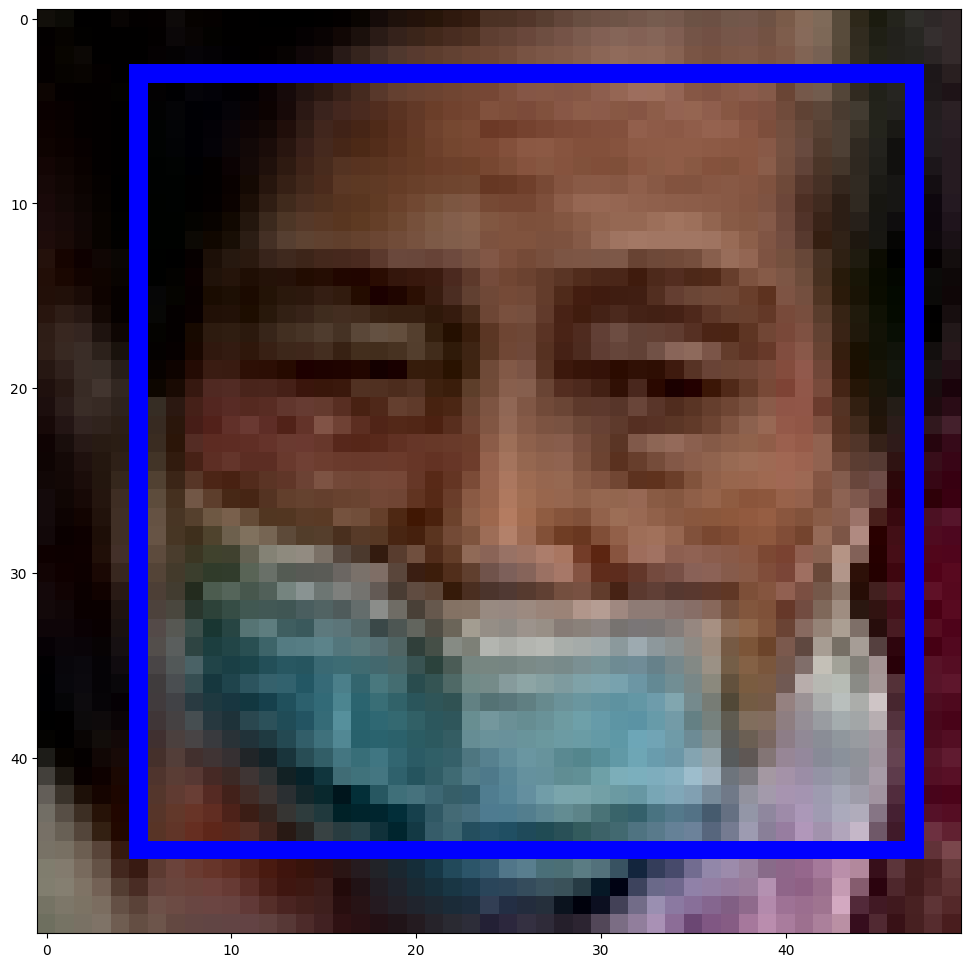

In [38]:
''' face detection using Open CV'''

''' face detector modle '''
face_model = cv2.CascadeClassifier('/kaggle/input/haar-cascade/haarcascade_frontalface_default.xml')

''' reading a mask  image '''
img = cv2.imread('/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/1004.png')

img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)

''' detecting face '''
faces = face_model.detectMultiScale(img,scaleFactor=1.1, minNeighbors=4)

''' converting color to BGR'''
out_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

''' plotting rectangle on detected face '''
for (x,y,w,h) in faces:
    cv2.rectangle(out_img,(x,y),(x+w,y+h),(0,0,255),1)
    
plt.figure(figsize=(12,12))
plt.imshow(out_img)

In [43]:
import cv2
import numpy as np

# Load the image
no_mask_img = cv2.imread('/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Test/WithoutMask/1148.png')

# Resize the image to (200, 200) to match the model's input shape
no_mask_img = cv2.resize(no_mask_img, (200, 200))

# Reshape the image
no_mask_img = np.reshape(no_mask_img, [1, 200, 200, 3])

# Scale the image
no_mask_img = no_mask_img / 255.0

# Perform prediction
prediction = model.predict(no_mask_img)


1/1 [==============================] - 0s 114ms/step


1/1 [==============================] - 0s 39ms/step


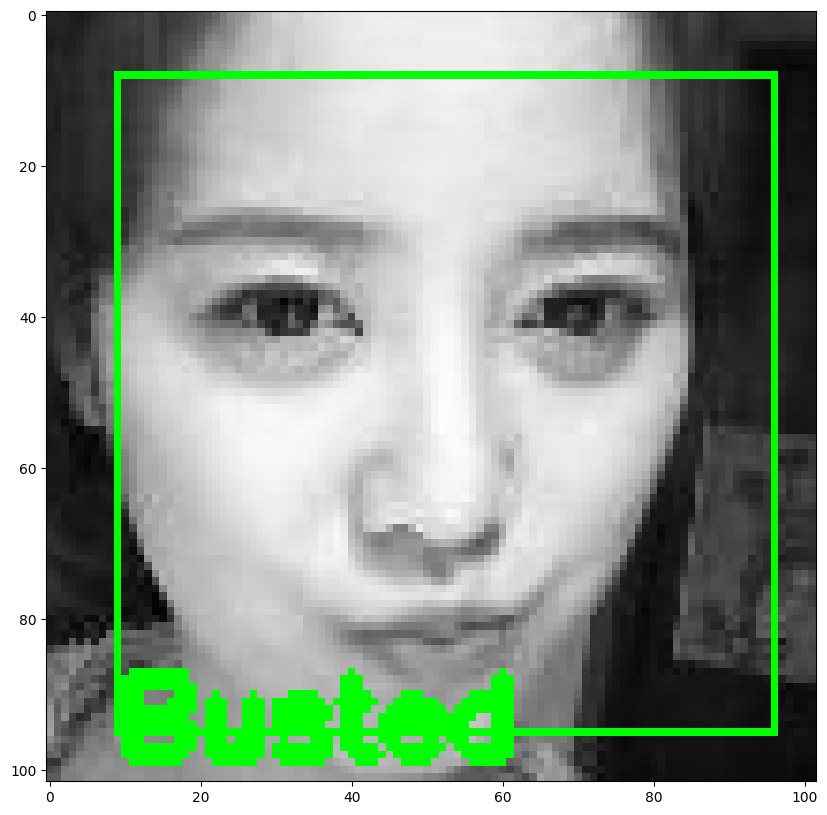

In [51]:
import cv2
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt

# Load the face detection model
face_model = cv2.CascadeClassifier('/kaggle/input/haar-cascade/haarcascade_frontalface_default.xml')

# Load your face mask detection model
#model = sequential()  # Replace 'YourModel()' with the actual model loading code

# Load the image
img = cv2.imread('/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Test/WithoutMask/1029.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

# Detect faces in the image
faces = face_model.detectMultiScale(img, scaleFactor=1.1, minNeighbors=4)

mask_label = {0: 'OK!', 1: 'Busted'}
dist_label = {0: (0, 255, 0), 1: (255, 0, 0)}
MIN_DISTANCE = 0

if len(faces) >= 1:
    label = [0 for i in range(len(faces))]
    
    # Check for distances between faces
    for i in range(len(faces) - 1):
        for j in range(i + 1, len(faces)):
            dist = distance.euclidean(faces[i][:2], faces[j][:2])
            if dist < MIN_DISTANCE:
                label[i] = 1
                label[j] = 1

    new_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)  # Convert to color

    for i in range(len(faces)):
        (x, y, w, h) = faces[i]
        crop = new_img[y:y+h, x:x+w]
        crop = cv2.resize(crop, (200, 200))  # Resize to match your model's input size
        crop = np.reshape(crop, [1, 200, 200, 3]) / 255.0  # Reshape and scale

        # Perform prediction
        mask_result = model.predict(crop)

        # Check if the model predicts a face mask with a threshold of 0.5
        is_mask = mask_result[0][0] > 0.5  # Adjust the threshold as needed

        cv2.putText(new_img, mask_label[int(is_mask)], (x, y + 90), cv2.FONT_HERSHEY_SIMPLEX, 0.5, dist_label[label[i]], 2)
        cv2.rectangle(new_img, (x, y), (x + w, y + h), dist_label[label[i]], 1)

    plt.figure(figsize=(10, 10))
    plt.imshow(new_img)
else:
    print("No Faces")


1/1 [==============================] - 0s 35ms/step


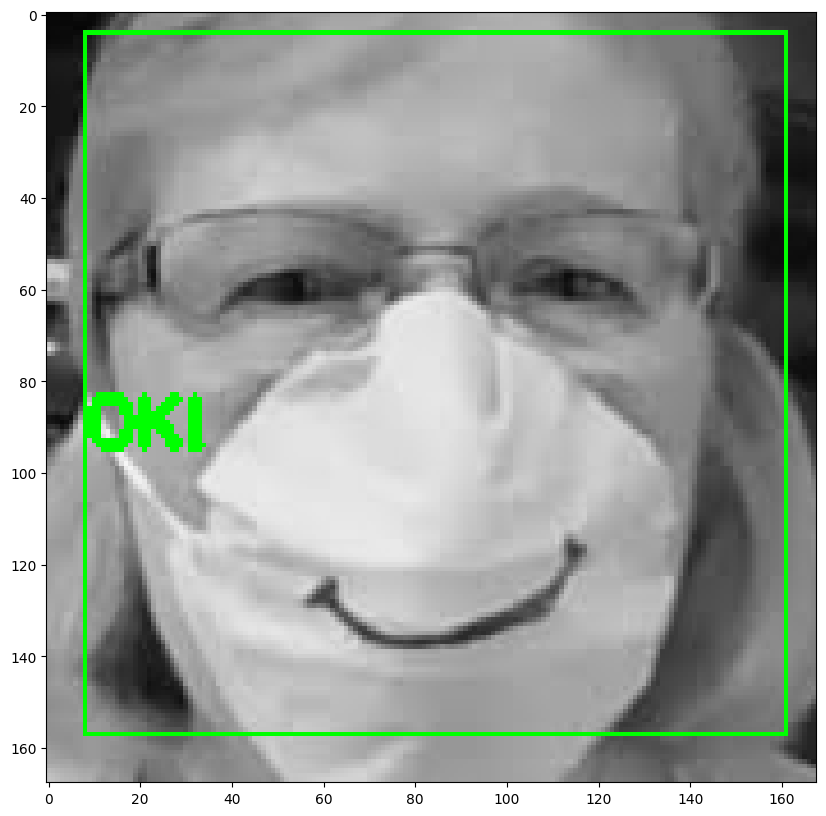

In [52]:
import cv2
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt

# Load the face detection model
face_model = cv2.CascadeClassifier('/kaggle/input/haar-cascade/haarcascade_frontalface_default.xml')

# Load your face mask detection model
#model = sequential()  # Replace 'YourModel()' with the actual model loading code

# Load the image
img = cv2.imread('/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Test/WithMask/1174.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

# Detect faces in the image
faces = face_model.detectMultiScale(img, scaleFactor=1.1, minNeighbors=4)

mask_label = {0: 'OK!', 1: 'Busted'}
dist_label = {0: (0, 255, 0), 1: (255, 0, 0)}
MIN_DISTANCE = 0

if len(faces) >= 1:
    label = [0 for i in range(len(faces))]
    
    # Check for distances between faces
    for i in range(len(faces) - 1):
        for j in range(i + 1, len(faces)):
            dist = distance.euclidean(faces[i][:2], faces[j][:2])
            if dist < MIN_DISTANCE:
                label[i] = 1
                label[j] = 1

    new_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)  # Convert to color

    for i in range(len(faces)):
        (x, y, w, h) = faces[i]
        crop = new_img[y:y+h, x:x+w]
        crop = cv2.resize(crop, (200, 200))  # Resize to match your model's input size
        crop = np.reshape(crop, [1, 200, 200, 3]) / 255.0  # Reshape and scale

        # Perform prediction
        mask_result = model.predict(crop)

        # Check if the model predicts a face mask with a threshold of 0.5
        is_mask = mask_result[0][0] > 0.5  # Adjust the threshold as needed

        cv2.putText(new_img, mask_label[int(is_mask)], (x, y + 90), cv2.FONT_HERSHEY_SIMPLEX, 0.5, dist_label[label[i]], 2)
        cv2.rectangle(new_img, (x, y), (x + w, y + h), dist_label[label[i]], 1)

    plt.figure(figsize=(10, 10))
    plt.imshow(new_img)
else:
    print("No Faces")
